# Softmax Regression

In softmax regression, we want to predict the category of an input. 

This is a generalization of the logistic regression model, and we will train a model to classify $K$ categories that looks like the following: $$p = \frac{1}{\sum_{j=1}^K \exp(a^{(j)T}x)} \begin{bmatrix} \exp(a^{(1)T}x) \\ \exp(a^{(2)T}x) \\ \vdots \\ \exp(a^{(K)T}x) \end{bmatrix}$$

The cost function that we are going to optimize looks like the following: $$J(a) = -\left[\sum_{i=1}^m\sum_{k=1}^K 1 \left\{ y^{(i)} = k \right\} \log \frac{\exp(a^{(k)T}x^{(i)})}{\sum_{j=1}^K \exp(a^{(j)T}x^{(i)})} \right]$$ where the notation $1\left\{ y^{(i)} = k \right\}$ means that it is $1$ when $y^{(i)} = k$ and $0$ otherwise.

## Example

In the following example, we will show how to perform a softmax regression using CVXPY.

First, we import all the packages that we need

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp

Next, we create the data that we are going to fit with our regression model. For this example, we are going to generate $m$ clusters around randomly-chosen points. All points in the same cluster are labeled as the same category for our softmax classifciatoin. We then graph what these clusters look like in the first two dimensions.

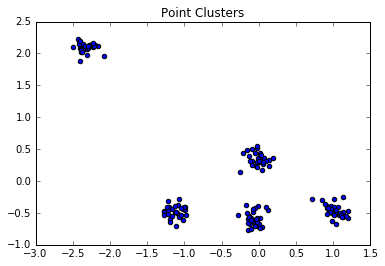

In [93]:
def generate_data(m=10, n=2, num_pts=5, noise=.01, scale = 1):
    centers = np.random.randn(m,1,n)*scale  
    points = (centers + noise*np.random.randn(m,num_pts,n)).reshape(m*num_pts, n)
    
    labels = np.zeros((m, num_pts))
    for i in range(m):
        labels[i,:] += i
    
    labels = labels.flatten().astype(int)
    labels_oh = np.zeros((m*num_pts, m))
    labels_oh[np.arange(m*num_pts), labels] = 1
    
    return points, labels_oh

m = 5 #number of categories

n = 4 #dimension of input points

num_pts = 30 #number of points per category

noise = 0.1
    
X,Y = generate_data(m, n, num_pts, noise)

Z = np.column_stack((X,Y))

np.random.shuffle(Z)
X = Z[:,:n]
Y = Z[:,n:]

split_idx = int(.7*X.shape[0])

X_train = X[:split_idx]
X_test = X[split_idx:]
Y_train = Y[:split_idx]
Y_test = Y[split_idx:]

%matplotlib inline
plt.scatter(X[:,0], X[:,1])
plt.title("Point Clusters")
plt.show()

Next, we set up our CVXPY problem and solve it. We then determine the accuracy of our softmax classification on the test data and print the result.

In [94]:
A = cp.Variable((m,n))

cost = -cp.sum(cp.multiply(Y,(A*X.T - cp.log_sum_exp(A*X.T)).T))

problem = cp.Problem(cp.Minimize(cost))

problem.solve()
    
num_correct = 0
for i in xrange(Y_test.shape[0]):
    prediction = np.exp(np.dot(A.value, X_test[i]))/np.sum(np.exp(np.dot(A.value, X_test[i])))
    prediction[np.where(prediction==np.max(prediction))] = 1
    prediction[np.where(prediction!=np.max(prediction))] = 0
    if (prediction == Y_test[i]).all():
        num_correct = num_correct + 1
        
print "Accuracy: ", num_correct / float(Y_test.shape[0])

Accuracy:  1.0
